# Pymaceuticals Inc.
---

### Analysis

- Through analysis of these trials one can say that Capomulin and Ramicane had the some of the most effective results when it came to treating tumors within mice. There was a sample size of 248 mice with the drugs being Capomulin,Ramicane, Ketapril, Naftisol, Zoniferol, Stelasyn, a Placebo,Infubinol, Ceftamin, and Propriva. The trials were measured in 5 day intervals keeping into account weight, the tumor volume, and their age. When it came to the testing we found that the Capomulin and Ramicane to be the more effective drug. The mice who had the Propiva drug actually died faster with the tumor than even the mice who received no treatment(Placebo). Capomulin has been showing on average a more substantial decrease in tumor volume in the rats that received the treatment. There is also a very strong positive correlation between Average tumor volume and weight which makes sense because the tumor volume also adds weight to the mouse. 
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
#Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = mouse_study_df[mouse_study_df.duplicated()]
dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data_all = mouse_study_df.loc[(mouse_study_df["Mouse ID"]== "g989"),:]
dup_data_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study_df.loc[(mouse_study_df["Mouse ID"]!= "g989"),:]
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_study["Mouse ID"].nunique()
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats_mouse = mouse_study.set_index(["Drug Regimen"])["Tumor Volume (mm3)"]
mean_tumor = stats_mouse.groupby(["Drug Regimen"]).mean()
median_tumor = stats_mouse.groupby(["Drug Regimen"]).median()
var_tumor = stats_mouse.groupby(["Drug Regimen"]).var()
std_tumor = stats_mouse.groupby(["Drug Regimen"]).std()
ste_tumor =stats_mouse.groupby(["Drug Regimen"]).sem()

In [8]:
stats_sum = pd.DataFrame({'Mean Tumor Volume' : mean_tumor,
                          'Median Tumor Volume' : median_tumor,
                          'Tumor Volume Variance' : var_tumor,
                          'Tumor Volume Std. Dev' : std_tumor,
                          'Tumor Volume Std. Err.': ste_tumor})
stats_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_stat = stats_mouse.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])
agg_stat
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [53]:
drugs = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn' , 'Placebo','Infubinol','Ceftamin','Propriva' ]
x_axis = np.arange(len(drugs))
tick_locations = [value+0.4 for value in x_axis]
timepoints_obs = mouse_study['Drug Regimen'].value_counts()
timepoints_obs


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Axes: xlabel='Drug Regimen'>

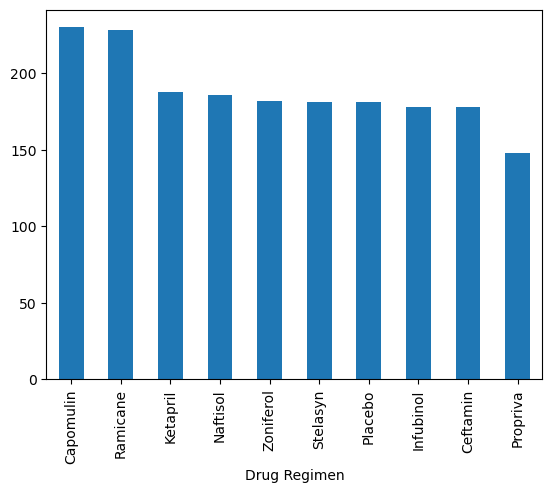

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed = timepoints_obs.plot.bar(x='Drug Regimen', y='# of observed mouse timepoints', rot=90)
observed


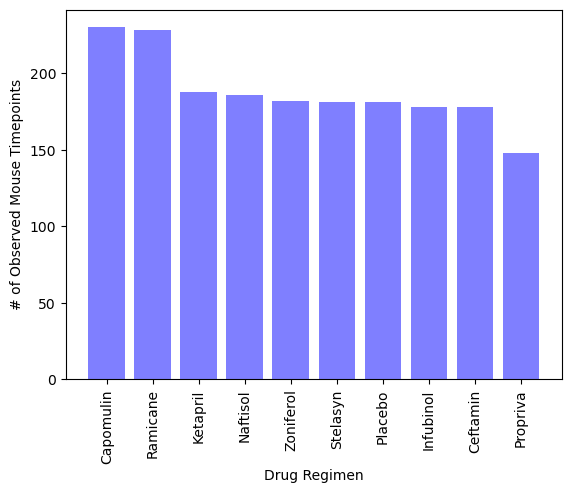

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis, timepoints_obs ,color = 'b', alpha=.5, align = "edge")
plt.xticks(tick_locations, drugs, rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

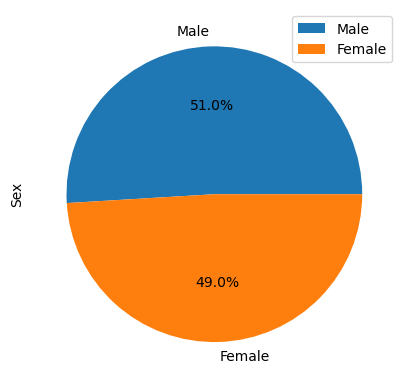

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = ["Male", "Female"]
male_female = mouse_study['Sex'].value_counts()
sex_ratio = pd.DataFrame({'Sex' : male_female},index = ["Male" ,"Female"])
plot = sex_ratio.plot.pie(y = 'Sex', autopct = "%1.1f%%")
plot

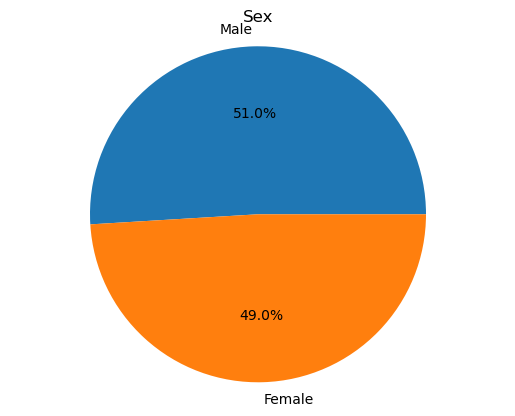

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Sex")
plt.pie(male_female, labels = sex, autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#timepoints_mouse = mouse_study['Mouse ID', 'Timepoint']
timepoints_mouse = mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
mouse_study_max = pd.merge(mouse_study, timepoints_mouse, on = 'Mouse ID', how = 'left')
mouse_study_max

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_max = mouse_study_max.rename(columns = {'Timepoint_x' : 'Timepoint' , 'Timepoint_y' : 'Final Timepoint'})
mouse_study_max

only_last = mouse_study_max.loc[mouse_study_max["Timepoint"] == mouse_study_max["Final Timepoint"]]
only_last

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
20,x336,0,45.000000,0,Naftisol,Female,4,29,0
53,h428,0,45.000000,0,Ketapril,Female,1,27,0
55,v199,0,45.000000,0,Naftisol,Female,17,29,0
108,o848,0,45.000000,0,Stelasyn,Female,14,27,0
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [59]:
capomulin_last = only_last.loc[only_last['Drug Regimen'] == 'Capomulin']
ramicane_last = only_last.loc[only_last['Drug Regimen'] == 'Ramicane']
infubinol_last = only_last.loc[only_last['Drug Regimen'] == 'Infubinol']
ceftamin_last = only_last.loc[only_last['Drug Regimen'] == 'Ceftamin']



In [63]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

tumor_vol = []

drugs_graphing = ['Capomulin','Ramicane','Infubinol','Ceftamin']

for drugs in drugs_graphing:
    drug = only_last.loc[only_last['Drug Regimen'] == drugs]
    tumor_vol.append(drug['Tumor Volume (mm3)'])
    if drugs == 'Capomulin':
        capomulin.append(only_last['Tumor Volume (mm3)'])
    elif drugs == 'Ramicane':
        ramicane.append(only_last['Tumor Volume (mm3)'])
    elif drugs == 'Infubinol':
        infubinol.append(only_last['Tumor Volume (mm3)'])
    elif drugs == 'Ceftamin':
        ceftamin.append(only_last['Tumor Volume (mm3)'])  
    
    
    drugs_quart = drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    drugs_iqr = drugs_upper - drugs_lower
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


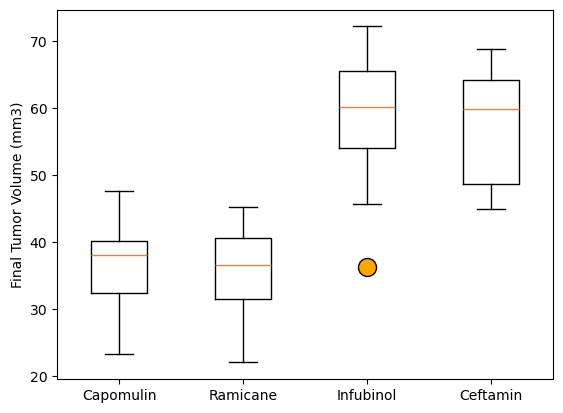

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
tumor_data = (capomulin_last['Tumor Volume (mm3)'],
              ramicane_last['Tumor Volume (mm3)'],
              infubinol_last['Tumor Volume (mm3)'],
              ceftamin_last['Tumor Volume (mm3)'])
labels = drugs_graphing
plots_outlier = dict(marker = 'o', markerfacecolor = 'orange', markersize=13, linestyle='none')
fig1,ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_data, labels=labels, flierprops = plots_outlier)
plt.show()

## Line and Scatter Plots

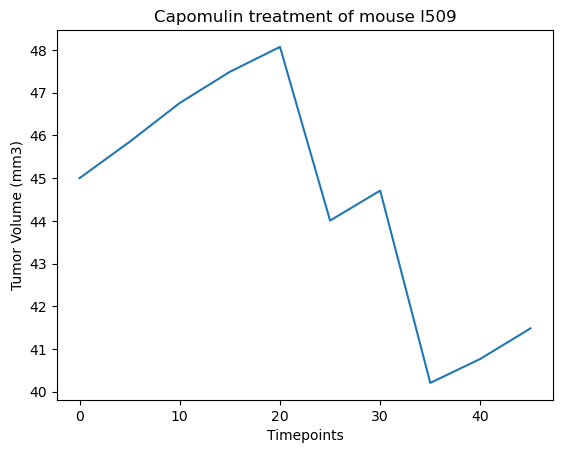

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = mouse_study_max.loc[mouse_study_max["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"] == "l509"]
time = capomulin_mouse.set_index(['Timepoint'])
time = time['Tumor Volume (mm3)']
plt.plot(time)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

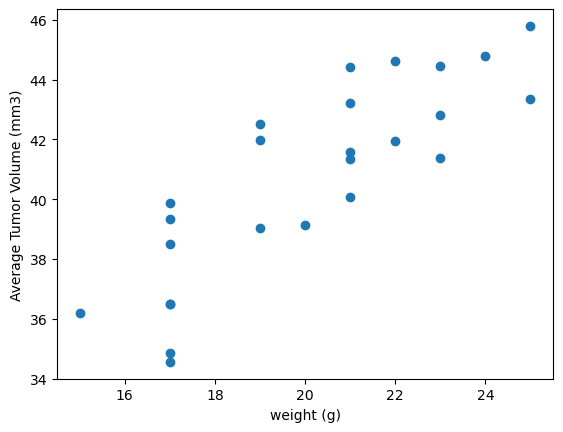

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_weight = capomulin.groupby(["Mouse ID"]).mean(['Tumor Volume (mm3)'])
capomulin_scatx = capomulin_weight['Weight (g)']
capomulin_scaty = capomulin_weight['Tumor Volume (mm3)']
plt.scatter(capomulin_scatx, capomulin_scaty)
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

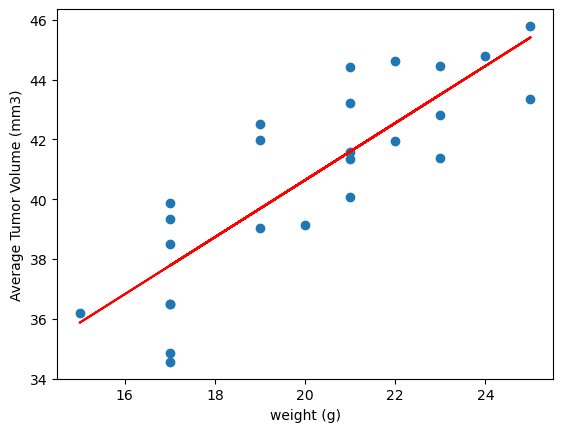

The correlation between mouse weight and the average tumor volume is 0.84


In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_scatx, capomulin_scaty)
regress_values = capomulin_scatx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_scatx, capomulin_scaty)
plt.plot(capomulin_scatx,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")